# ALUNOS:

- Aluno 1:
- Aluno 2:
- Aluno 3:


# CIÊNCIA DE DADOS

## Etapas previstas para realizar Análise Exploratória dos Dados:
- Importar as bibliotecas necessárias
- Separar as variáveis de input (independentes) e o target (alvo, objetivo)
- Separar a base em treino e teste
- Definir os algoritmos a serem testados
- Criar o classificador e/ou o regressor
- Treinar o modelo com a base de treino
- Avaliar o r2
- Predizer o modelo com a base de teste
- Avaliar os resultados obtidos
- Comparar os modelos
- Apresentar os resultados

## Análise de Custos e Desperdícios de Materiais

O desafio consiste no gerenciamento de recursos próprios: controlar custos crescentes, evitar desperdícios e garantir que os insumos sejam utilizados de forma eficiente e adequada. Os dados de consumo mensal trazem informações ricas sobre materiais, medicamentos, operações, centros de custo, especialidades médicas e estabelecimentos. A partir deles, é possível identificar
padrões de uso, prever demandas futuras e, principalmente, analisar perdas e desperdícios. Neste
desafio, os alunos deverão aplicar os conhecimentos adquiridos em sala de aula para explorar essas
informações e propor soluções práticas que apoiem a gestão hospitalar.

## Mineração de Dados
- Explorar e preparar os dados de consumo mensal.
- Mapear itens com maior impacto financeiro e identificar padrões de consumo por material, operação, centro de custo e especialidade.
- Consumos atípicos (picos sazonais não justificados).
- Itens subutilizados ou de baixa rotatividade.
- Identificar itens similares (ex.: medicamentos com a mesma finalidade terapêutica) e avaliar sobreposição de consumo.

## Inteligência Artificial
- Desenvolver modelos de previsão de consumo
- Aplicar metodologias para agrupar especialidades e centros de custo com padrões de consumo semelhantes.
- Implementar detecção de anomalias para identificar consumos desproporcionais, potenciais desperdícios e possíveis substituições por itens similares de menor custo.

## Resultados Esperados:
- Evolução do consumo mensal.
- Comparativo de consumo.
- Indicadores de perdas e desperdícios (consumo anômalo, estoques sem giro, itens de alto custo com alternativas similares).
- Previsão de consumo para apoiar planejamento de compras.
- Grupos de especialidades/centros de custo com padrões de consumo similares.
- Lista de possíveis anomalias e desperdícios detectados.
- Recomendações estratégicas para otimização do uso de recurso próprio.
- Bônus: outras analises não indicadas acima

# Importar e visualizar a base

In [1]:
# Importar as bibliotecas necessárias para solucionar o probema
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importar a base de dados
df_features_final = pd.read_parquet('data/df_features_final.parquet')

In [3]:
# Visualizar as bases
display(df_features_final.head())

,custo_total,estabilidade_mensal,qtd_total,frequencia_erros,ticket_medio,mix_medicamentos,Consumo,Devolução Paciente,Doações - saída,Execução Prescrição,Medicamentos Controlados Vencidos,Perdas e Quebras,Perdas por estabilidade,Produtos vencidos,Quebras e Contaminações,Quebras/Contaminação Med Controlados,Saída por troca comercial,Sobras por estabilidade
ds_centro_custo,,,,,,,,,,,,,,,,,,
1º ANDAR - UNIDADE DE INTERNAÇÃO,4566.10,34.138250,673.856,384,6.776077,0.734375,0.0,0.0,0.0,0.0,0.0,0.664044,0.0,0.014463,0.281752,0.039741,0.0,0.0
2° ANDAR UNIDADE DE INTERNAÇÃO- TORRE II,1039.92,9.700418,284.259,190,3.658354,0.778947,0.0,0.0,0.0,0.0,0.0,0.479373,0.0,0.059101,0.421061,0.040465,0.0,0.0
2º ANDAR - UNIDADE DE INTERNAÇÃO,2005.90,10.958666,561.028,338,3.575401,0.727811,0.0,0.0,0.0,0.0,0.0,0.611182,0.0,0.030490,0.302034,0.056294,0.0,0.0
2º ANDAR TORRE I - COVID,0.10,0.000000,1.000,1,0.100000,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.0
3° ANDAR UNIDADE DE INTERNAÇÃO- TORRE II,585.57,4.113769,161.000,131,3.637081,0.916031,0.0,0.0,0.0,0.0,0.0,0.071383,0.0,0.078197,0.739587,0.110832,0.0,0.0


## Visualizando um resumo das informações


In [4]:
# Verificando o domínio dos dados
display(df_features_final.info())

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 45 entries, 1º ANDAR - UNIDADE DE INTERNAÇÃO to UTI NEOPEDIATRICA
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   custo_total                           45 non-null     float64
 1   estabilidade_mensal                   45 non-null     float64
 2   qtd_total                             45 non-null     float64
 3   frequencia_erros                      45 non-null     int64  
 4   ticket_medio                          45 non-null     float64
 5   mix_medicamentos                      45 non-null     float64
 6   Consumo                               45 non-null     float64
 7   Devolução Paciente                    45 non-null     float64
 8   Doações - saída                       45 non-null     float64
 9   Execução Prescrição                   45 non-null     float64
 10  Medicamentos Controlados Vencidos   

None

# **Conclusão: identifique quais colunas (variáveis) seriam utilizadas em um modelo de aprendizagem de máquina**
## **Relevantes para Previsão** obtidas após a realização da análise exploratória


In [5]:
# Apresente as colunas a sere utilizando na versão final do Projeto UNIMED


In [6]:
# Apresente as colunas eliminadas da versão final do Projeto UNIMED


# PROJETO FINAL DE CIÊNCIA DE DADOS

## Resultados Esperados:
- Evolução do consumo mensal.
- Comparativo de consumo.
- Indicadores de perdas e desperdícios (consumo anômalo, estoques sem giro, itens de alto custo com alternativas similares).
- Previsão de consumo para apoiar planejamento de compras.
- Grupos de especialidades/centros de custo com padrões de consumo similares.
- Lista de possíveis anomalias e desperdícios detectados.
- Recomendações estratégicas para otimização do uso de recurso próprio.
- Bônus: outras analises não indicadas acima


## Aprendizado de Máquina

- Definir 3 algorítmos de aprendizado de máquina a ser testado no Desafio

In [7]:
# Importar as bibliotecas necessárias para o aprendizado
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [8]:
# Definir as variáveis de input e a target

# 1. Para o algoritmo de clusterização
# Definir Input (X) - Todas as colunas numéricas da nossa base de features
# Target (y) não existe em clusterização
X_cols = df_features_final.columns # Pegamos todas as 18 colunas

# Normalização (Escalonamento)
# Usamos RobustScaler para que a Farmácia Central (Outlier) não distorça a escala dos pequenos
scaler = RobustScaler()
X_scaled = scaler.fit_transform(df_features_final)

# Transformar de volta em DataFrame para facilitar visualização (opcional, mas didático)
df_scaled = pd.DataFrame(X_scaled, columns=X_cols, index=df_features_final.index)

print("Dados normalizados com sucesso (RobustScaler).")
display(df_scaled.head())

Dados normalizados com sucesso (RobustScaler).


,custo_total,estabilidade_mensal,qtd_total,frequencia_erros,ticket_medio,mix_medicamentos,Consumo,Devolução Paciente,Doações - saída,Execução Prescrição,Medicamentos Controlados Vencidos,Perdas e Quebras,Perdas por estabilidade,Produtos vencidos,Quebras e Contaminações,Quebras/Contaminação Med Controlados,Saída por troca comercial,Sobras por estabilidade
ds_centro_custo,,,,,,,,,,,,,,,,,,
1º ANDAR - UNIDADE DE INTERNAÇÃO,1.501480,0.267533,1.264790,1.994681,0.007473,0.020079,0.0,0.0,0.0,0.0,0.0,1.542601,0.0,-0.140709,0.668945,1.146119,0.0,0.0
2° ANDAR UNIDADE DE INTERNAÇÃO- TORRE II,0.000000,-0.107490,0.501836,0.962766,-0.095764,0.093724,0.0,0.0,0.0,0.0,0.0,1.073368,0.0,-0.095647,1.015951,1.166997,0.0,0.0
2º ANDAR - UNIDADE DE INTERNAÇÃO,0.411323,-0.088181,1.043837,1.750000,-0.098511,0.009233,0.0,0.0,0.0,0.0,0.0,1.408284,0.0,-0.124529,0.719464,1.623513,0.0,0.0
2º ANDAR TORRE I - COVID,-0.442765,-0.256352,-0.052875,-0.042553,-0.213592,0.458955,0.0,0.0,0.0,0.0,0.0,-0.144682,0.0,-0.155309,-0.032876,28.839924,0.0,0.0
3° ANDAR UNIDADE DE INTERNAÇÃO- TORRE II,-0.193466,-0.193223,0.260456,0.648936,-0.096469,0.320218,0.0,0.0,0.0,0.0,0.0,0.036698,0.0,-0.076368,1.809370,3.196392,0.0,0.0


In [9]:
# 2. Para os outros algoritmos
# Criar variável target binária: Risco de Desperdício
# Critérios combinados:
# - Alta taxa de vencimento (> percentil 75)
# - Alta taxa de quebra (> percentil 75)
# - Alta frequência de erros (> percentil 75)

# Calcular limites (percentil 75)
limite_vencimento = df_features_final['Produtos vencidos'].quantile(0.75)
limite_quebra = df_features_final['Quebras e Contaminações'].quantile(0.75)
limite_erros = df_features_final['frequencia_erros'].quantile(0.75)

# Criar score de risco (0-3 pontos)
df_features_final['risco_score'] = (
    (df_features_final['Produtos vencidos'] > limite_vencimento).astype(int) +
    (df_features_final['Quebras e Contaminações'] > limite_quebra).astype(int) +
    (df_features_final['frequencia_erros'] > limite_erros).astype(int)
)

# Target: Alto Risco = 2 ou mais critérios atendidos
df_features_final['alto_risco_desperdicio'] = (df_features_final['risco_score'] >= 2).astype(int)

# Definir variáveis de entrada (excluindo target e variáveis auxiliares para evitar data leakage)
X = df_features_final.drop([
    'alto_risco_desperdicio', 'risco_score', 'Produtos vencidos', 'Quebras e Contaminações', 'frequencia_erros'
], axis=1)

y = df_features_final['alto_risco_desperdicio']

print("=" * 70)
print("CONFIGURAÇÃO DO CLASSIFICADOR DE RISCO DE DESPERDÍCIO")
print("=" * 70)
print(f"\nCritérios para Alto Risco (2 ou mais):")
print(f"  - Produtos vencidos > {limite_vencimento:.2f}%")
print(f"  - Quebras e Contaminações > {limite_quebra:.2f}%")
print(f"  - Frequência de erros > {limite_erros:.2f}")
print(f"\nDistribuição das Classes:")
print(f"  Baixo Risco (0): {(y == 0).sum()} centros ({(y == 0).sum()/len(y)*100:.1f}%)")
print(f"  Alto Risco (1):  {(y == 1).sum()} centros ({(y == 1).sum()/len(y)*100:.1f}%)")
print(f"\nVariáveis de entrada: {X.shape[1]} features")
print("=" * 70)

CONFIGURAÇÃO DO CLASSIFICADOR DE RISCO DE DESPERDÍCIO

Critérios para Alto Risco (2 ou mais):
  - Produtos vencidos > 0.99%
  - Quebras e Contaminações > 0.40%
  - Frequência de erros > 190.00

Distribuição das Classes:
  Baixo Risco (0): 41 centros (91.1%)
  Alto Risco (1):  4 centros (8.9%)

Variáveis de entrada: 15 features


In [10]:
# Dividir a base de dados em treino e teste

# Em algoritmos de Clusterização (Não Supervisionado) para fins de Análise Exploratória,
# utilizamos a base completa como "Treino" para que o algoritmo identifique padrões
# em toda a população de dados disponível. Não há divisão de Treino/Teste.

X_train = X_scaled
# X_test = Não se aplica

# Em algoritmos de Regressão (Supervisionado)
# Dividir em treino e teste (80/20)
X_train_2, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Treinar, Predizer e Avaliar os Modelos

### Primeiro algoritmo

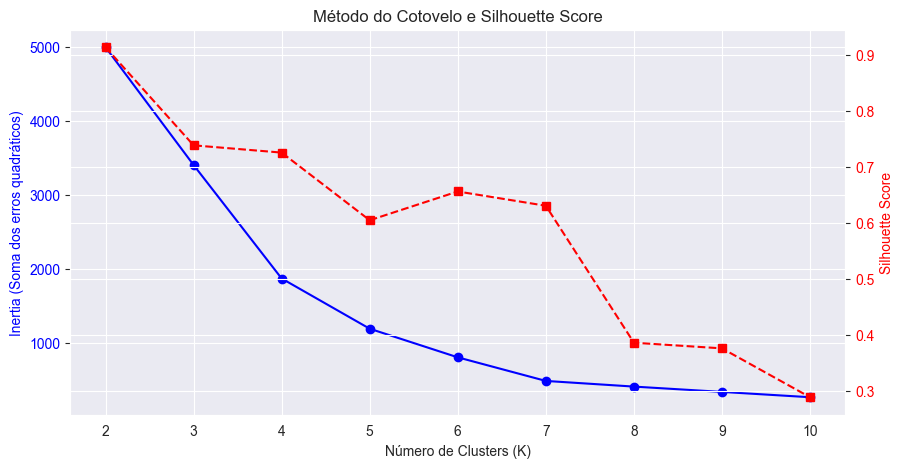

In [11]:
# Criar o classificador e/ou regressor
# Testando K de 2 a 10 clusters
range_k = range(2, 11)
inertias = []
silhouettes = []

for k in range_k:
    # Criar e treinar o modelo temporário
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_train)

    # Guardar métricas
    inertias.append(kmeans_temp.inertia_) # Erro quadrático (quanto menor, mais compacto)
    silhouettes.append(silhouette_score(X_train, kmeans_temp.labels_)) # Coesão (quanto maior, melhor)

# --- Plotando os Gráficos ---
fig, ax1 = plt.subplots(figsize=(10, 5))

# Gráfico do Cotovelo (Inertia)
ax1.plot(range_k, inertias, 'bo-')
ax1.set_xlabel('Número de Clusters (K)')
ax1.set_ylabel('Inertia (Soma dos erros quadráticos)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_title('Método do Cotovelo e Silhouette Score')

# Gráfico da Silhouette
ax2 = ax1.twinx()
ax2.plot(range_k, silhouettes, 'rs--')
ax2.set_ylabel('Silhouette Score', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.show()

"Embora K=2 apresente o maior Silhouette Score (0.91), ele reflete apenas a dicotomia óbvia entre a Farmácia Central (Outlier) e os demais setores, o que traz pouco valor analítico para a gestão. Optamos por K=4 (Score 0.72) pois mantém uma robustez estatística elevada (virtualmente idêntica a K=3) enquanto proporciona uma granularidade de negócio superior, permitindo diferenciar perfis de desperdício clínico versus operacional, sem incorrer na perda de coesão observada em K=5 (Score 0.60)."

In [12]:
# Definindo o modelo com 4 Clusters (Estratégico)
# random_state=42 garante que os resultados sejam sempre iguais (reprodutibilidade)
kmeans_model = KMeans(n_clusters=4, random_state=42, n_init=10)

In [13]:
# Treinar o modelo
# Treinando com a base normalizada (X_train)
kmeans_model.fit(X_train)

print("Modelo K-Means treinado com sucesso para 4 clusters.")

Modelo K-Means treinado com sucesso para 4 clusters.


In [14]:
# Predizer o modelo
# 1. Obter os rótulos (0, 1, 2, 3) para cada centro de custo
labels = kmeans_model.labels_

# 2. Adicionar essa coluna na nossa base de análise (df_features_final)
df_features_final['cluster'] = labels

# 3. Visualizar quantos centros caíram em cada grupo
print("Distribuição dos Centros por Cluster:")
display(df_features_final['cluster'].value_counts().sort_index())

Distribuição dos Centros por Cluster:


cluster
0    41
1     1
2     2
3     1
Name: count, dtype: int64

In [15]:
# Avaliar o modelo
# Agrupar por cluster e calcular a média das principais variáveis
# Usamos a base original (df_features_final) para ver os valores em Reais (R$), não os normalizados
analise_clusters = df_features_final.groupby('cluster').mean()

# Selecionando apenas as colunas que mais importam para explicar o perfil
colunas_chave = [
    'custo_total',
    'qtd_total',
    'ticket_medio',
    'mix_medicamentos',
    'frequencia_erros',
    'Produtos vencidos',       # % Vencimento
    'Quebras e Contaminações'  # % Quebra
]

# Exibindo a tabela colorida para facilitar a leitura
display(analise_clusters[colunas_chave].style.background_gradient(cmap='RdYlGn', axis=0))

,custo_total,qtd_total,ticket_medio,mix_medicamentos,frequencia_erros,Produtos vencidos,Quebras e Contaminações
cluster,,,,,,,
0,1975.629756,566.761707,51.404227,0.554662,94.195122,0.460734,0.267229
1,359136.330000,32902.934000,10.915024,0.793601,3532.000000,0.919685,0.031576
2,10.255000,1.500000,5.152500,1.000000,1.000000,0.000000,0.000000
3,86614.180000,680.000000,127.373794,0.000000,115.000000,0.993114,0.006040


### Segundo algoritmo

In [16]:
# Criar o classificador e/ou regressor

# Criar e treinar o modelo Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

print("Modelo Random Forest Classifier criado com sucesso.")

Modelo Random Forest Classifier criado com sucesso.


In [17]:
# Treinar o modelo
rf_model.fit(X_train_2, y_train)

print("Modelo Random Forest Classifier treinado com sucesso.")
print(f"Dados de treino: {len(X_train_2)} amostras")
print(f"  - Baixo Risco: {(y_train == 0).sum()}")
print(f"  - Alto Risco:  {(y_train == 1).sum()}")
print(f"Dados de teste: {len(X_test)} amostras")
print(f"  - Baixo Risco: {(y_test == 0).sum()}")
print(f"  - Alto Risco:  {(y_test == 1).sum()}")

Modelo Random Forest Classifier treinado com sucesso.
Dados de treino: 36 amostras
  - Baixo Risco: 33
  - Alto Risco:  3
Dados de teste: 9 amostras
  - Baixo Risco: 8
  - Alto Risco:  1


In [18]:
# Predizer o modelo

# Fazer predições no conjunto de treino e teste
y_pred_train_rf = rf_model.predict(X_train_2)
y_pred_test_rf = rf_model.predict(X_test)

# Probabilidades para análise de risco
y_pred_proba_train_rf = rf_model.predict_proba(X_train_2)[:, 1]
y_pred_proba_test_rf = rf_model.predict_proba(X_test)[:, 1]

# Adicionar predições ao dataframe completo
df_features_final['risco_predito_rf'] = rf_model.predict(X)
df_features_final['prob_alto_risco_rf'] = rf_model.predict_proba(X)[:, 1]

print("Predições realizadas com sucesso.")
print(f"\nCentros classificados como Alto Risco: {df_features_final['risco_predito_rf'].sum()}")

Predições realizadas com sucesso.

Centros classificados como Alto Risco: 3


AVALIAÇÃO DO MODELO RANDOM FOREST CLASSIFIER

Acurácia (Treino): 1.0000
Acurácia (Teste):  0.8889
ROC-AUC (Treino):  1.0000
ROC-AUC (Teste):   0.5625

RELATÓRIO DE CLASSIFICAÇÃO (Conjunto de Teste)
              precision    recall  f1-score   support

 Baixo Risco       0.89      1.00      0.94         8
  Alto Risco       0.00      0.00      0.00         1

    accuracy                           0.89         9
   macro avg       0.44      0.50      0.47         9
weighted avg       0.79      0.89      0.84         9

Matriz de Confusão:
[[8 0]
 [1 0]]

Importância das Variáveis (Top 10):


/home/danilo/PycharmProjects/projeto-ciencia-de-dados/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/danilo/PycharmProjects/projeto-ciencia-de-dados/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/danilo/PycharmProjects/projeto-ciencia-de-dados/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` par

,Feature,Importance
12,Quebras/Contaminação Med Controlados,0.176495
0,custo_total,0.172340
1,estabilidade_mensal,0.157746
4,mix_medicamentos,0.122272
2,qtd_total,0.115044
10,Perdas e Quebras,0.108647
3,ticket_medio,0.076166
11,Perdas por estabilidade,0.068853
9,Medicamentos Controlados Vencidos,0.002437
6,Devolução Paciente,0.000000


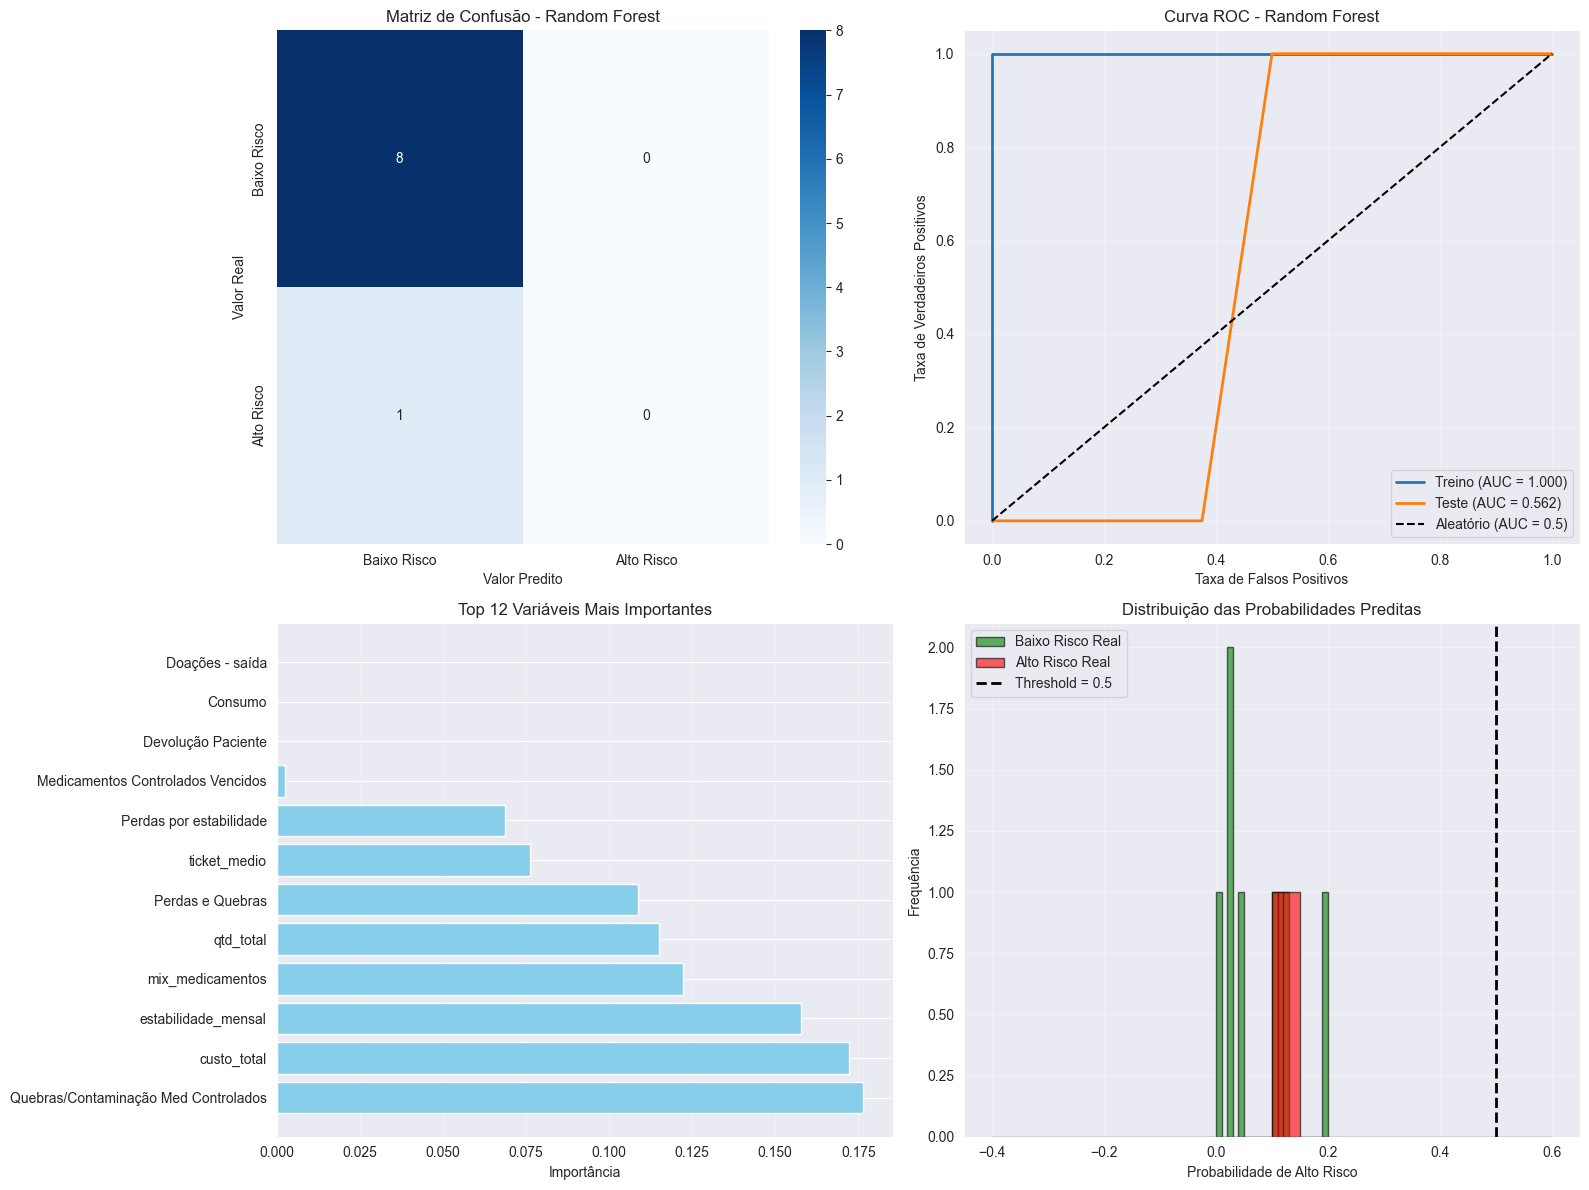


TOP 10 CENTROS COM MAIOR PROBABILIDADE DE DESPERDÍCIO - RANDOM FOREST


,custo_total,prob_alto_risco_rf,risco_predito_rf,Produtos vencidos,Quebras e Contaminações,frequencia_erros
ds_centro_custo,,,,,,
Térreo - Unidade de Internação,2396.230000,78.000000,1,0.067832,0.439353,335
CENTRO CIRÚRGICO,2122.330000,68.000000,1,0.020591,0.546315,206
UNIMED 24 HORAS,2056.860000,68.000000,1,0.153846,0.675394,512
FARMÁCIA SATELITE UNIMED 24H,4409.810000,20.000000,0,0.353385,0.401459,239
U.T.I. ADULTO,2990.670000,17.000000,0,0.064384,0.283559,280
1º ANDAR - UNIDADE DE INTERNAÇÃO,4566.100000,16.000000,0,0.014463,0.281752,384
2º ANDAR - UNIDADE DE INTERNAÇÃO,2005.900000,12.000000,0,0.030490,0.302034,338
C.D.U CENTRO DE DIAGNÓSTICOS UNIMED,4500.300000,12.000000,0,0.534178,0.139397,26
SAD HOME CARE,4459.200000,11.000000,0,0.984724,0.000000,33


In [19]:
# Avaliar o modelo

# Calcular métricas de desempenho
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
roc_auc_train_rf = roc_auc_score(y_train, y_pred_proba_train_rf)
roc_auc_test_rf = roc_auc_score(y_test, y_pred_proba_test_rf)

# Exibir resultados
print("=" * 70)
print("AVALIAÇÃO DO MODELO RANDOM FOREST CLASSIFIER")
print("=" * 70)
print(f"\nAcurácia (Treino): {accuracy_train_rf:.4f}")
print(f"Acurácia (Teste):  {accuracy_test_rf:.4f}")
print(f"ROC-AUC (Treino):  {roc_auc_train_rf:.4f}")
print(f"ROC-AUC (Teste):   {roc_auc_test_rf:.4f}")
print("\n" + "=" * 70)
print("RELATÓRIO DE CLASSIFICAÇÃO (Conjunto de Teste)")
print("=" * 70)
print(classification_report(y_test, y_pred_test_rf,
                          target_names=['Baixo Risco', 'Alto Risco']))

# Matriz de Confusão
cm_rf = confusion_matrix(y_test, y_pred_test_rf)
print("Matriz de Confusão:")
print(cm_rf)
print("=" * 70)

# Visualizar importância das variáveis
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nImportância das Variáveis (Top 10):")
display(feature_importance_rf.head(10).style.background_gradient(cmap='Blues'))

# Visualizações
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Matriz de Confusão
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0],
            xticklabels=['Baixo Risco', 'Alto Risco'],
            yticklabels=['Baixo Risco', 'Alto Risco'])
axes[0, 0].set_title('Matriz de Confusão - Random Forest')
axes[0, 0].set_ylabel('Valor Real')
axes[0, 0].set_xlabel('Valor Predito')

# Gráfico 2: Curva ROC
fpr_train_rf, tpr_train_rf, _ = roc_curve(y_train, y_pred_proba_train_rf)
fpr_test_rf, tpr_test_rf, _ = roc_curve(y_test, y_pred_proba_test_rf)
axes[0, 1].plot(fpr_train_rf, tpr_train_rf, label=f'Treino (AUC = {roc_auc_train_rf:.3f})', linewidth=2)
axes[0, 1].plot(fpr_test_rf, tpr_test_rf, label=f'Teste (AUC = {roc_auc_test_rf:.3f})', linewidth=2)
axes[0, 1].plot([0, 1], [0, 1], 'k--', label='Aleatório (AUC = 0.5)')
axes[0, 1].set_xlabel('Taxa de Falsos Positivos')
axes[0, 1].set_ylabel('Taxa de Verdadeiros Positivos')
axes[0, 1].set_title('Curva ROC - Random Forest')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Gráfico 3: Importância das Features
top_features_rf = feature_importance_rf.head(12)
axes[1, 0].barh(top_features_rf['Feature'], top_features_rf['Importance'], color='skyblue')
axes[1, 0].set_xlabel('Importância')
axes[1, 0].set_title('Top 12 Variáveis Mais Importantes')
axes[1, 0].grid(True, alpha=0.3, axis='x')

# Gráfico 4: Distribuição de Probabilidades
axes[1, 1].hist(y_pred_proba_test_rf[y_test == 0], bins=20, alpha=0.6,
                label='Baixo Risco Real', color='green', edgecolor='black')
axes[1, 1].hist(y_pred_proba_test_rf[y_test == 1], bins=20, alpha=0.6,
                label='Alto Risco Real', color='red', edgecolor='black')
axes[1, 1].axvline(0.5, color='black', linestyle='--', linewidth=2, label='Threshold = 0.5')
axes[1, 1].set_xlabel('Probabilidade de Alto Risco')
axes[1, 1].set_ylabel('Frequência')
axes[1, 1].set_title('Distribuição das Probabilidades Preditas')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Exibir centros de maior risco
print("\n" + "=" * 70)
print("TOP 10 CENTROS COM MAIOR PROBABILIDADE DE DESPERDÍCIO - RANDOM FOREST")
print("=" * 70)
top_risk_rf = df_features_final.nlargest(10, 'prob_alto_risco_rf')[
    ['custo_total', 'prob_alto_risco_rf', 'risco_predito_rf', 'Produtos vencidos',
     'Quebras e Contaminações', 'frequencia_erros']
].copy()
top_risk_rf['prob_alto_risco_rf'] = (top_risk_rf['prob_alto_risco_rf'] * 100).round(2)
display(top_risk_rf.style.background_gradient(cmap='Blues', axis=0))

### Terceiro algoritmo

In [20]:
# Criar o classificador e/ou regressor
# Modelo Gradient Boosting Classifier para Risco de Desperdício
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    verbose=0
)

print("Modelo Gradient Boosting Classifier criado com sucesso!")

Modelo Gradient Boosting Classifier criado com sucesso!


In [21]:
# Treinar o modelo
gb_model.fit(X_train_2, y_train)

print("✓ Modelo Gradient Boosting Classifier treinado com sucesso!")
print(f"\nDados de treino: {len(X_train_2)} amostras")
print(f"  - Baixo Risco: {(y_train == 0).sum()}")
print(f"  - Alto Risco:  {(y_train == 1).sum()}")
print(f"\nDados de teste: {len(X_test)} amostras")
print(f"  - Baixo Risco: {(y_test == 0).sum()}")
print(f"  - Alto Risco:  {(y_test == 1).sum()}")

✓ Modelo Gradient Boosting Classifier treinado com sucesso!

Dados de treino: 36 amostras
  - Baixo Risco: 33
  - Alto Risco:  3

Dados de teste: 9 amostras
  - Baixo Risco: 8
  - Alto Risco:  1


In [22]:
# Predizer o modelo

# Fazer predições
y_pred_train_class = gb_model.predict(X_train_2)
y_pred_test_class = gb_model.predict(X_test)

# Probabilidades para curva ROC
y_pred_proba_train = gb_model.predict_proba(X_train_2)[:, 1]
y_pred_proba_test = gb_model.predict_proba(X_test)[:, 1]

# Adicionar predições ao dataframe completo
df_features_final['risco_predito'] = gb_model.predict(X)
df_features_final['prob_alto_risco'] = gb_model.predict_proba(X)[:, 1]

print("✓ Predições realizadas com sucesso!")
print(f"\nCentros classificados como Alto Risco: {df_features_final['risco_predito'].sum()}")

✓ Predições realizadas com sucesso!

Centros classificados como Alto Risco: 3


AVALIAÇÃO DO CLASSIFICADOR DE RISCO DE DESPERDÍCIO

Acurácia (Treino): 1.0000
Acurácia (Teste):  0.8889
ROC-AUC (Treino):  1.0000
ROC-AUC (Teste):   0.6250

RELATÓRIO DE CLASSIFICAÇÃO (Conjunto de Teste)
              precision    recall  f1-score   support

 Baixo Risco       0.89      1.00      0.94         8
  Alto Risco       0.00      0.00      0.00         1

    accuracy                           0.89         9
   macro avg       0.44      0.50      0.47         9
weighted avg       0.79      0.89      0.84         9

Matriz de Confusão:
[[8 0]
 [1 0]]

Importância das Variáveis (Top 10):


/home/danilo/PycharmProjects/projeto-ciencia-de-dados/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/danilo/PycharmProjects/projeto-ciencia-de-dados/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/danilo/PycharmProjects/projeto-ciencia-de-dados/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` par

,Feature,Importance
0,custo_total,0.636524
12,Quebras/Contaminação Med Controlados,0.214489
1,estabilidade_mensal,0.115693
3,ticket_medio,0.018516
2,qtd_total,0.014344
10,Perdas e Quebras,0.000396
4,mix_medicamentos,0.000039
6,Devolução Paciente,0.000000
5,Consumo,0.000000
8,Execução Prescrição,0.000000


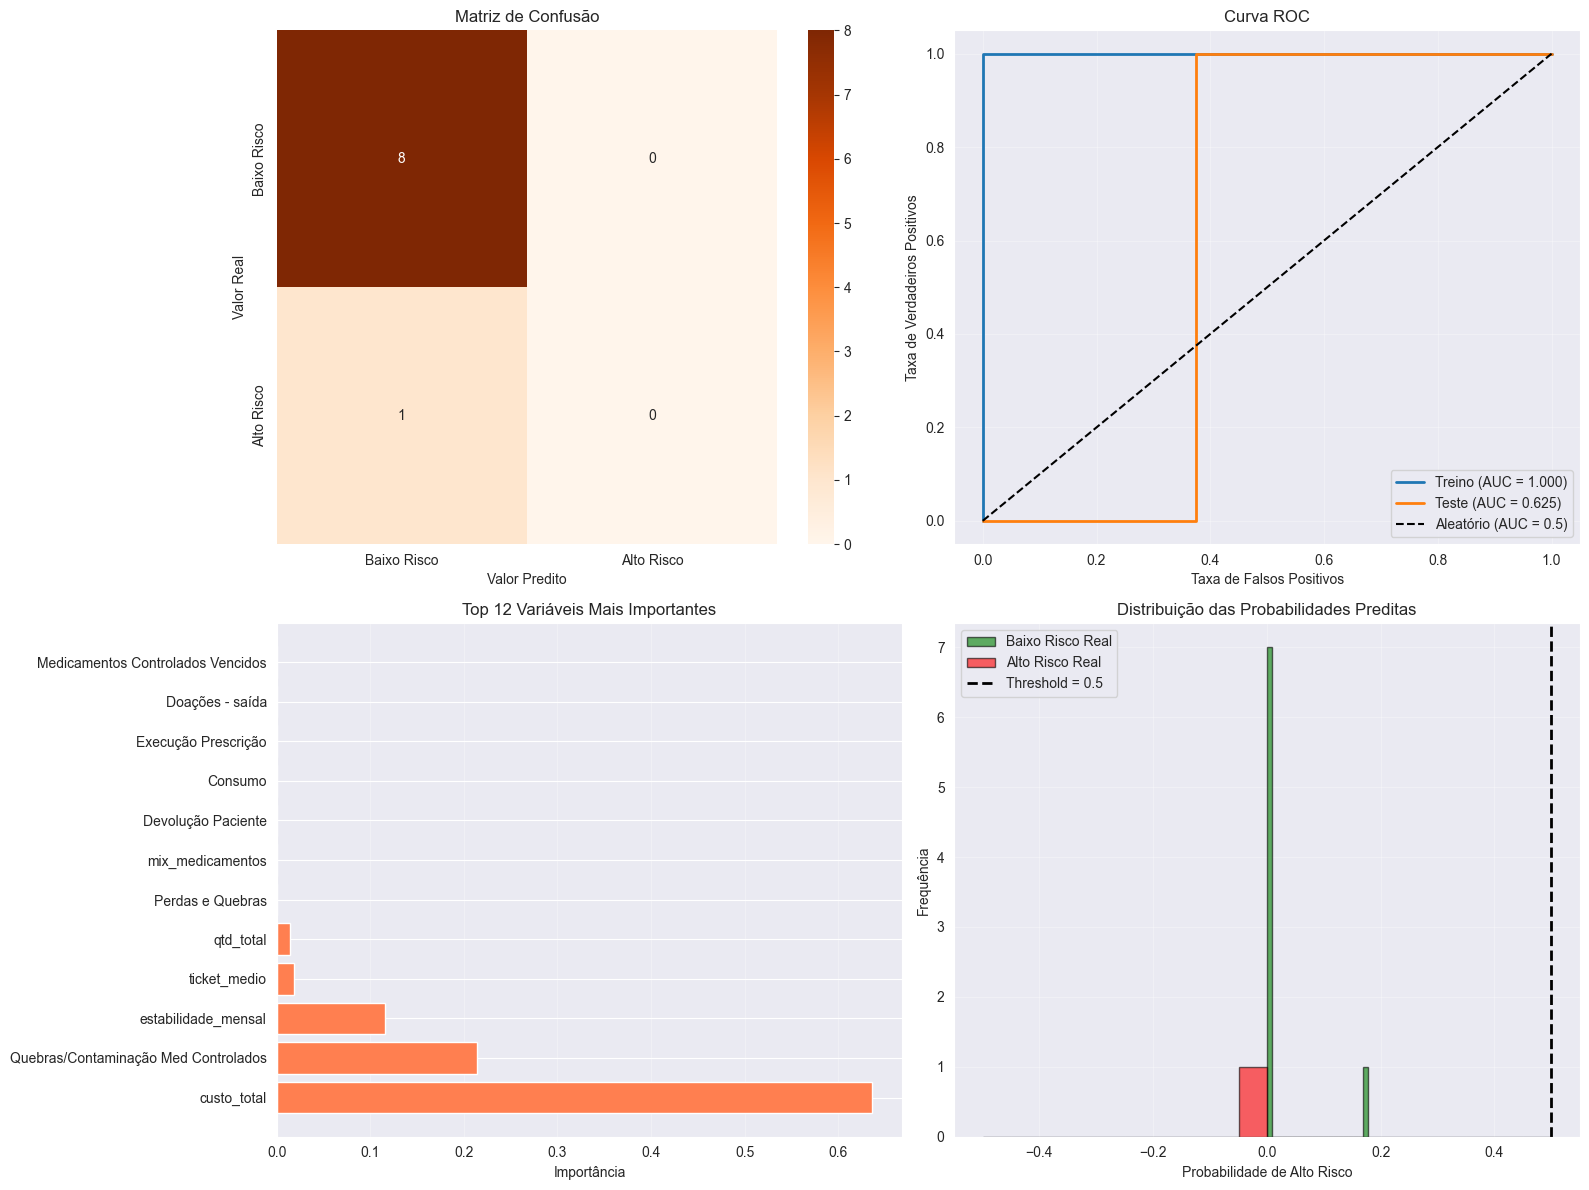


TOP 10 CENTROS COM MAIOR PROBABILIDADE DE DESPERDÍCIO


,custo_total,prob_alto_risco,risco_predito,Produtos vencidos,Quebras e Contaminações,frequencia_erros
ds_centro_custo,,,,,,
Térreo - Unidade de Internação,2396.230000,99.640000,1,0.067832,0.439353,335
UNIMED 24 HORAS,2056.860000,99.640000,1,0.153846,0.675394,512
CENTRO CIRÚRGICO,2122.330000,99.630000,1,0.020591,0.546315,206
HEMODINAMICA,2623.020000,17.810000,0,0.042760,0.946600,9
2º ANDAR - UNIDADE DE INTERNAÇÃO,2005.900000,0.350000,0,0.030490,0.302034,338
FARMÁCIA SATELITE UNIMED 24H,4409.810000,0.270000,0,0.353385,0.401459,239
OPME,1921.710000,0.240000,0,1.000000,0.000000,5
U.T.I. ADULTO,2990.670000,0.220000,0,0.064384,0.283559,280
1º ANDAR - UNIDADE DE INTERNAÇÃO,4566.100000,0.180000,0,0.014463,0.281752,384


In [23]:
# Avaliar o modelo

# Calcular métricas
accuracy_train = accuracy_score(y_train, y_pred_train_class)
accuracy_test = accuracy_score(y_test, y_pred_test_class)
roc_auc_train = roc_auc_score(y_train, y_pred_proba_train)
roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)

# Exibir resultados
print("=" * 70)
print("AVALIAÇÃO DO CLASSIFICADOR DE RISCO DE DESPERDÍCIO")
print("=" * 70)
print(f"\nAcurácia (Treino): {accuracy_train:.4f}")
print(f"Acurácia (Teste):  {accuracy_test:.4f}")
print(f"ROC-AUC (Treino):  {roc_auc_train:.4f}")
print(f"ROC-AUC (Teste):   {roc_auc_test:.4f}")
print("\n" + "=" * 70)
print("RELATÓRIO DE CLASSIFICAÇÃO (Conjunto de Teste)")
print("=" * 70)
print(classification_report(y_test, y_pred_test_class,
                          target_names=['Baixo Risco', 'Alto Risco']))

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred_test_class)
print("Matriz de Confusão:")
print(cm)
print("=" * 70)

# Importância das variáveis
feature_importance_class = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nImportância das Variáveis (Top 10):")
display(feature_importance_class.head(10).style.background_gradient(cmap='Oranges'))

# Visualizações
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Matriz de Confusão
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', ax=axes[0, 0],
            xticklabels=['Baixo Risco', 'Alto Risco'],
            yticklabels=['Baixo Risco', 'Alto Risco'])
axes[0, 0].set_title('Matriz de Confusão')
axes[0, 0].set_ylabel('Valor Real')
axes[0, 0].set_xlabel('Valor Predito')

# Gráfico 2: Curva ROC
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_proba_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test)
axes[0, 1].plot(fpr_train, tpr_train, label=f'Treino (AUC = {roc_auc_train:.3f})', linewidth=2)
axes[0, 1].plot(fpr_test, tpr_test, label=f'Teste (AUC = {roc_auc_test:.3f})', linewidth=2)
axes[0, 1].plot([0, 1], [0, 1], 'k--', label='Aleatório (AUC = 0.5)')
axes[0, 1].set_xlabel('Taxa de Falsos Positivos')
axes[0, 1].set_ylabel('Taxa de Verdadeiros Positivos')
axes[0, 1].set_title('Curva ROC')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Gráfico 3: Importância das Features
top_features_class = feature_importance_class.head(12)
axes[1, 0].barh(top_features_class['Feature'], top_features_class['Importance'], color='coral')
axes[1, 0].set_xlabel('Importância')
axes[1, 0].set_title('Top 12 Variáveis Mais Importantes')
axes[1, 0].grid(True, alpha=0.3, axis='x')

# Gráfico 4: Distribuição de Probabilidades
axes[1, 1].hist(y_pred_proba_test[y_test == 0], bins=20, alpha=0.6,
                label='Baixo Risco Real', color='green', edgecolor='black')
axes[1, 1].hist(y_pred_proba_test[y_test == 1], bins=20, alpha=0.6,
                label='Alto Risco Real', color='red', edgecolor='black')
axes[1, 1].axvline(0.5, color='black', linestyle='--', linewidth=2, label='Threshold = 0.5')
axes[1, 1].set_xlabel('Probabilidade de Alto Risco')
axes[1, 1].set_ylabel('Frequência')
axes[1, 1].set_title('Distribuição das Probabilidades Preditas')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Exibir centros de maior risco
print("\n" + "=" * 70)
print("TOP 10 CENTROS COM MAIOR PROBABILIDADE DE DESPERDÍCIO")
print("=" * 70)
top_risk = df_features_final.nlargest(10, 'prob_alto_risco')[
    ['custo_total', 'prob_alto_risco', 'risco_predito', 'Produtos vencidos',
     'Quebras e Contaminações', 'frequencia_erros']
].copy()
top_risk['prob_alto_risco'] = (top_risk['prob_alto_risco'] * 100).round(2)
display(top_risk.style.background_gradient(cmap='Reds', axis=0))